## Quiz 2 
#### Date: 20/09/2018
---
### Your name:
---
### Instructions:
Read each problem carefully and follow the questions/instructions asked. Provide your answers clearly with supporting work.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## These data points will be used in the exercises:

x = [[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
y = [[3.76405235]
 [3.20015721]
 [4.57873798]
 [6.6408932 ]
 [7.06755799]
 [5.02272212]
 [7.75008842]
 [7.44864279]
 [8.29678115]
 [9.6105985 ]]


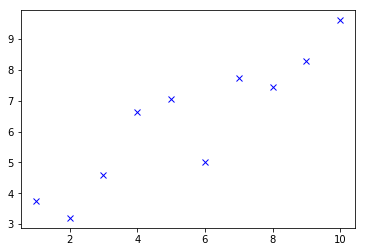

In [4]:
m = 10 # training examples
x = linspace(1, 10, m).reshape(m, 1)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ]).reshape(m, 1)

print('x =', x)
print('y =', y)

plot(x, y, 'bx')

### Let's prepare the data points for matrix manipulation:

In [5]:
X = insert(x, 0, ones(len(x)), axis=1)
Y = array(y).reshape(m, 1)

print('X = \n', X)
print('Y = \n', Y)

X = 
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
Y = 
 [[3.76405235]
 [3.20015721]
 [4.57873798]
 [6.6408932 ]
 [7.06755799]
 [5.02272212]
 [7.75008842]
 [7.44864279]
 [8.29678115]
 [9.6105985 ]]


# Problems

## Problem 1: Linear Regression

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement Linear Regression and closed-form expression to find the estimated values of $\mathbf{w}$:

$$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

w = 
 [[2.87377128]
 [0.62986398]]


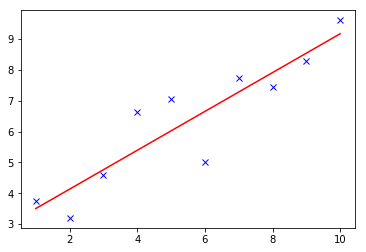

In [6]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

print('w = \n', w)

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Problem 2: Batch Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Batch Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.  
At each training step, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha \left(\left(\mathbf{X}\mathbf{w} - \mathbf{y}\right)^T\mathbf{X}_i\right)$$

[[2.5404884 ]
 [0.67773692]]


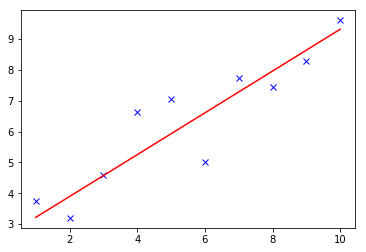

In [8]:
n, d = X.shape
s = 1000 # learning steps
alpha = 0.001 # learning rate

w = zeros(d).reshape(d, 1)

for step in range(s):
    w = w - alpha * (X.dot(w) - Y).T.dot(X).T

print(w)

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Problem 3: Stochastic Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Stochastic Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.
In each step, iterate through all $j$ samples and, for each sample, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha\left(\mathbf{X}^{(j)}\mathbf{w} - \mathbf{y}^{(j)}\right)\mathbf{X}^{(j)}_i$$

[[2.53358958]
 [0.67762494]]


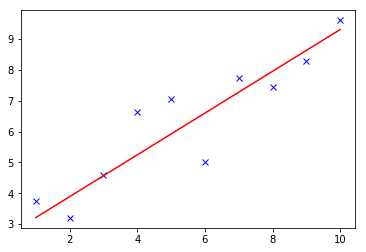

In [9]:
n, d = X.shape
s = 1000 # learning steps
alpha = 0.001 # learning rate

w = zeros(d).reshape(d, 1)

for step in range(s):
    for j in range(n):
        w -= alpha * (X[j].dot(w) - Y[j]).T.dot(X[[j], :].reshape(1,d)).reshape(d,1)

print(w)

p = plot(X[:,1], Y, 'bx')
p = plot(X[:,1], X.dot(w), 'r-')

## Problem 4: write a function fit(X,Y) 

The function fit(X,Y) receives a matrix $X \in \mathbb{R}^{m,n}$, where m is the number of samples and n is the number of features, and a matrix $Y \in \mathbb{R}^{m}$, and returns the matrix of coefficients $\mathbf{w} \in \mathbb{R}^{n+1}$.   
Implement the function 

In [10]:
def fit(X, Y):
    X = insert(x, 0, ones(len(x)), axis=1)
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

w = 
 [[2.87377128]
 [0.62986398]]


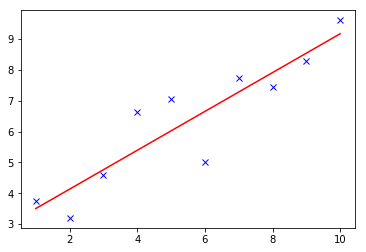

In [11]:
# let's test it!
m = 10
x = linspace(1, m, m).reshape(m,1)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ]).reshape(m,1)

w = fit(x,y)

print('w = \n', w)

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

# Using Scikit-Learn for Linear Regression

Check if Scikit-Learn is installed in your system. If not, install it.

Resources and documentation: http://scikit-learn.org/

In [12]:
import sklearn

## Problem 5: find the coefficients $\mathbf{w}$ using sklearn.linear_model.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
from sklearn.linear_model import LinearRegression
LinearRegression?

Init signature: LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, optional, default 1
    The number of jobs to use for the computation.
    If -1 all CPUs

Coefficients =  [0.62986398] , Intercept =  2.8737712786666685


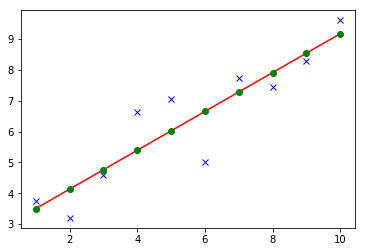

In [14]:
m = 10
x = linspace(1, m, m)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ])
x.shape = (m,1)

model = LinearRegression()
model.fit(x, y)

print('Coefficients = ', model.coef_, ', Intercept = ', model.intercept_)
# compare the results to the Ordinary Least Squares result!

p = plot (x, y, 'bx')
p = plot (x, x*model.coef_+model.intercept_, 'r-')
p = plot (x, model.predict(x), 'go')

# Working with the Boston house-prices dataset

Let's load the dataset and print the description

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

X = boston.data
y = boston.target

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now, create a plot for each feature, to have an idea of their correlation with the target variable

<Figure size 1440x1440 with 0 Axes>

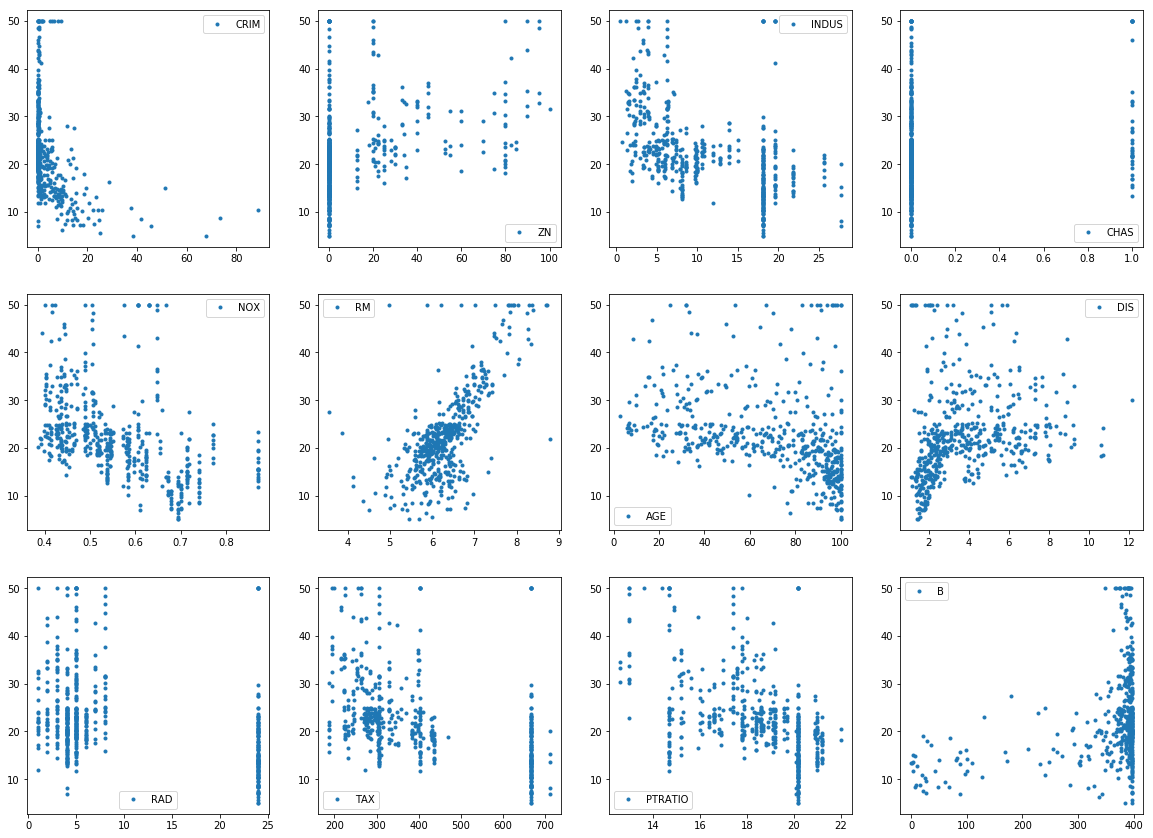

In [16]:
figure(figsize=(20,20))
nr_plots = len(boston.feature_names)-1

figure(figsize=(20,20))
nr_plots = len(boston.feature_names)-1
for i in range(nr_plots):
    ax = subplot(4, 4, i+1)
    ax.plot(X[:, i], y, '.', label=boston.feature_names[i])
    legend()

## Problem 6: Create a Regression model using Scikit-Learn Linear Regression for the Boston house-prices dataset

Use sklearn.linear_model.LinearRegression to predict the target variable y using only the average number of rooms (RM)

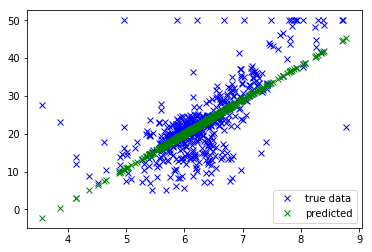

In [17]:
Xtrain = X[:,[5]]

model = LinearRegression()
model.fit(Xtrain, y)
pred = model.predict(Xtrain)

plot(Xtrain, y, 'bx', label='true data')
plot(Xtrain, pred, 'gx', label='predicted')
legend()